# **Muhammad Afiq Husyairi   (2018769)**


We want to predict whether the patient have breast cancer using Keras Deep Learning Model through 29 parameters which is radius, concavity, area, etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('breast_cancer_Data.csv')
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.describe()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.shape

(569, 32)

Drop Null Values

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",df.isnull().sum())

df = df.dropna()
df.shape

 
Count total NaN at each column in a DataFrame : 

 id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


(569, 32)

No Null values

Drop Duplicated Values


In [ ]:
df.drop_duplicates(inplace=True)
df.shape


(569, 32)

No duplicates


<Axes: >

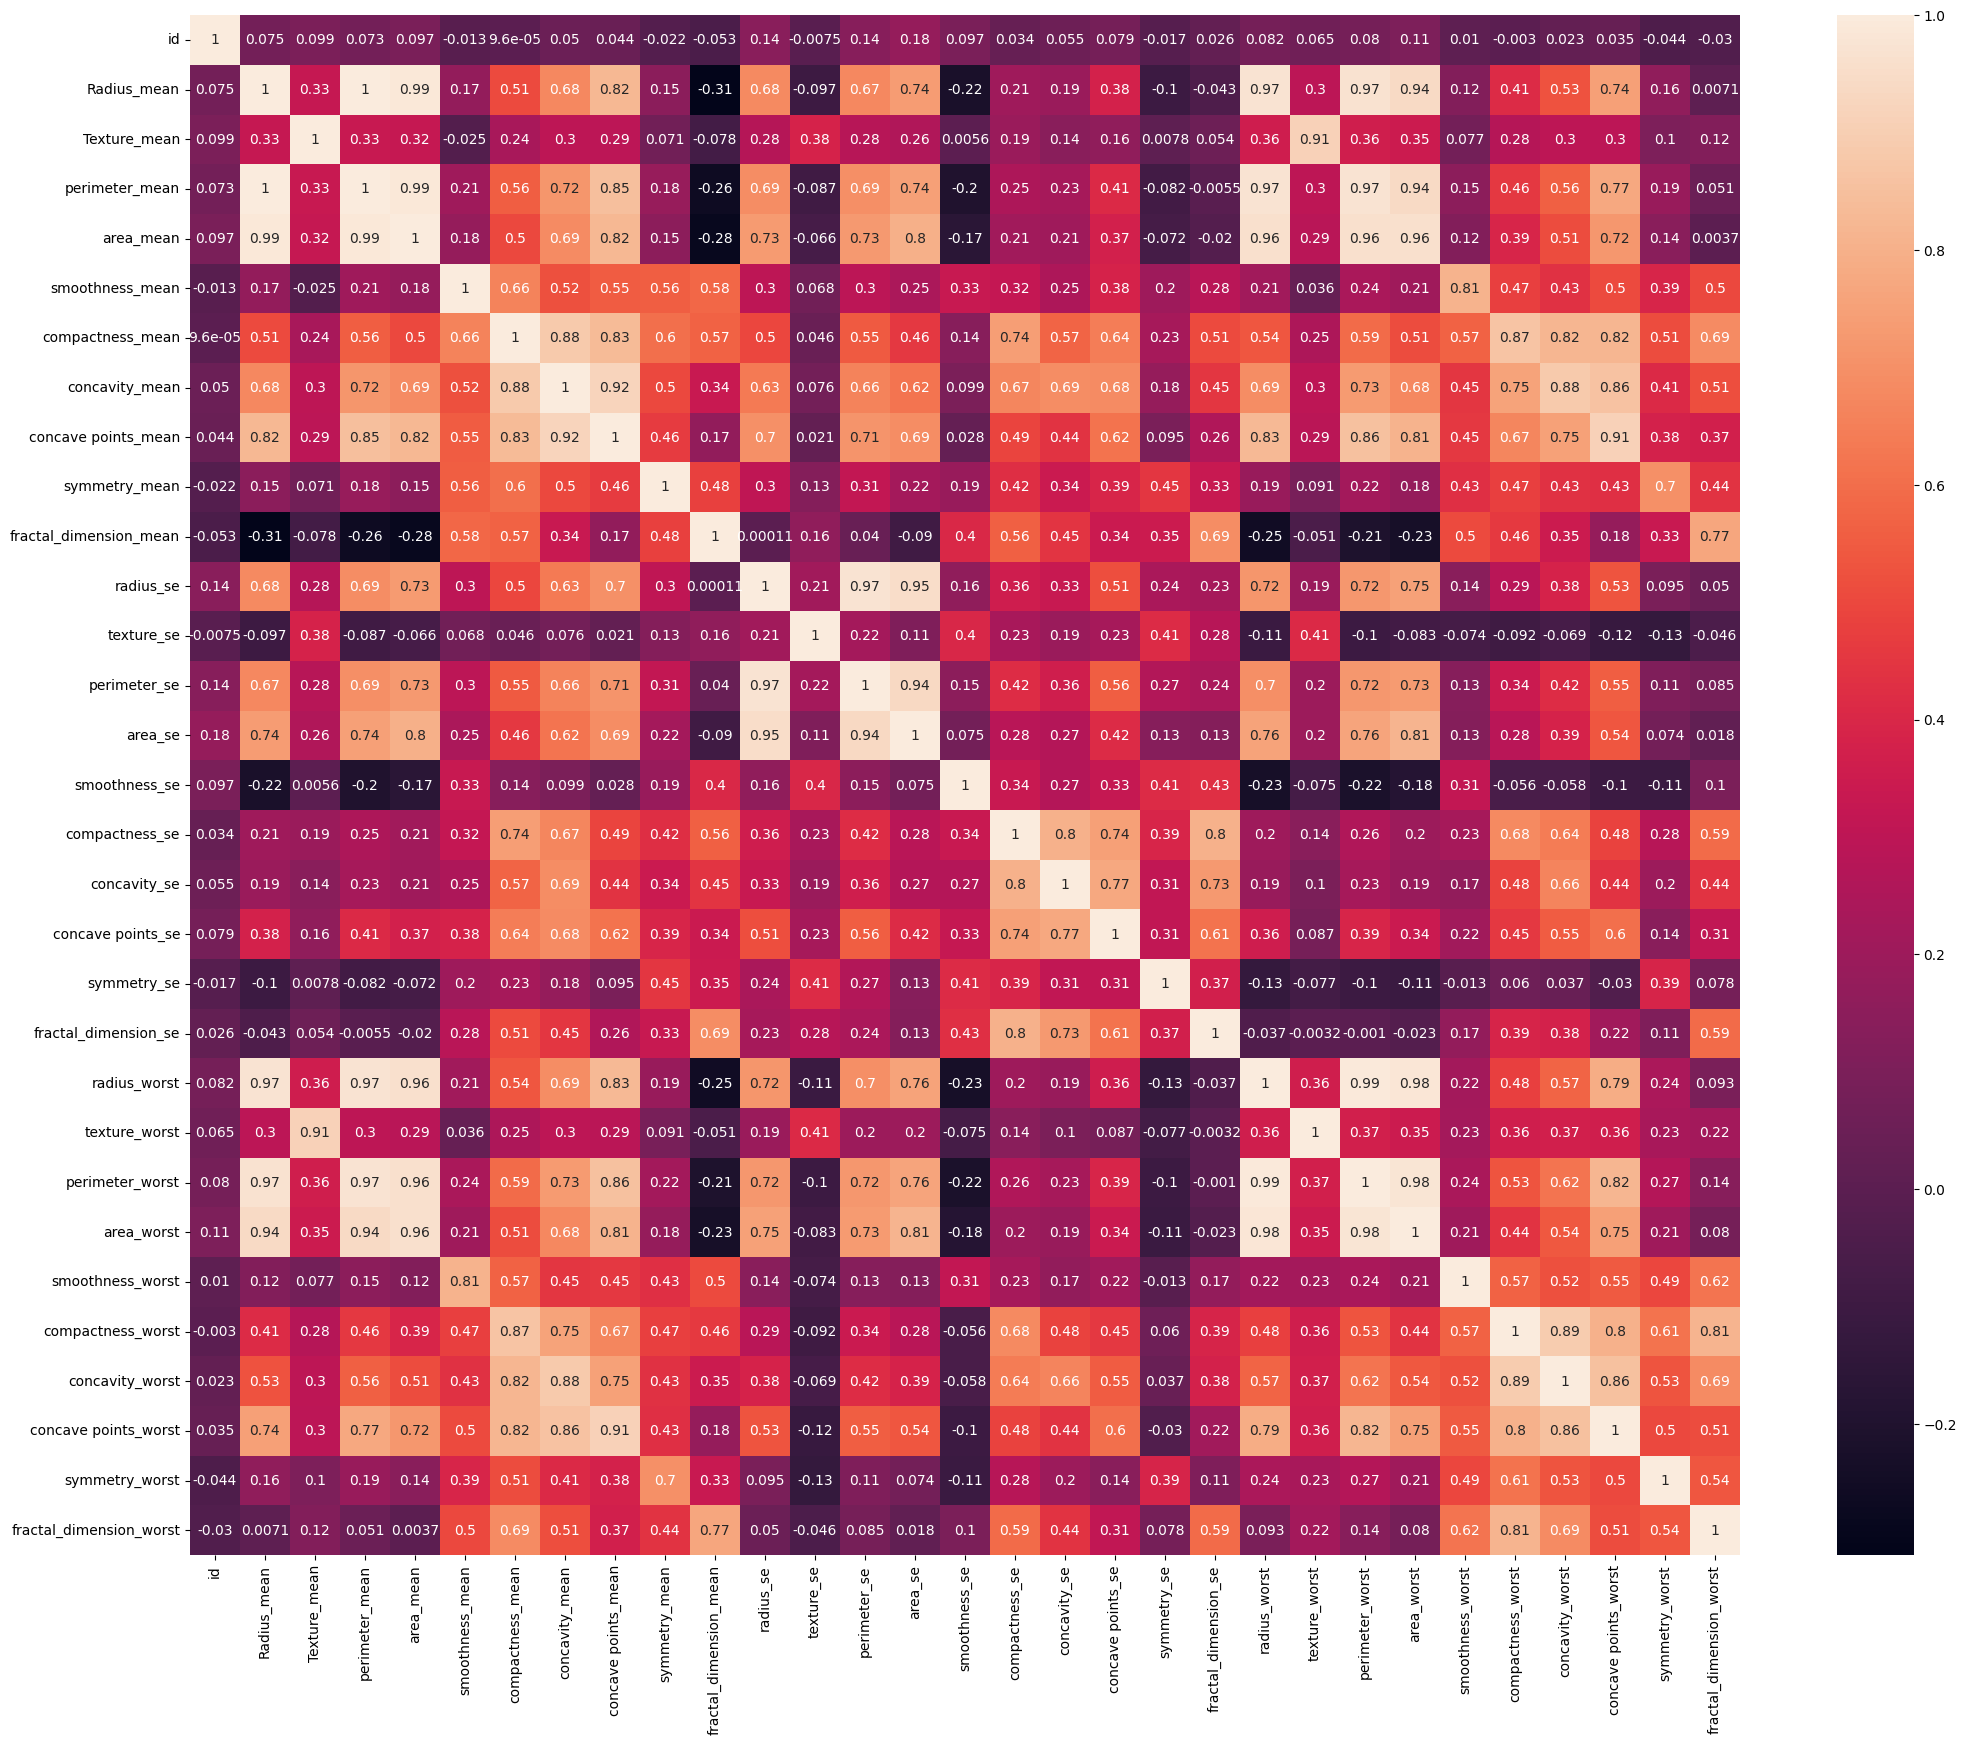

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(data=df.corr(), annot=True)

Convert the diagnosis into 0 and 1



In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
df['diagnosis'] = lb.fit_transform(df['diagnosis'])

df['diagnosis'].unique()



array([1, 0])

In [ ]:
dataset = df.values
dataset.shape

(569, 32)

Convert from DataFrame to numpy array

In [ ]:
# load all columns in the array except number and diagnosis
X = dataset[:,2:31]
X.shape


(569, 29)

In [ ]:
y = dataset[:,1]
y.shape
y[:5]

array([1., 1., 1., 1., 1.])

Normalize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

In [ ]:
print(scaler)

StandardScaler()


In [ ]:
X_standardized = scaler.transform(X)

data = pd.DataFrame(X_standardized)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,-3.434082e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-6.243785e-18,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.230480e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00
25%,-6.893853e-01,-7.274670e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01
50%,-2.150816e-01,-9.927291e-02,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01
75%,4.693926e-01,5.824340e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01
max,3.971288e+00,4.649409e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00


# Start The Training Process

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

Build a neural network with 29 input layer, 16 neuron on the first hidden layer, another hidden layer with 8 neurons, and 1 output. All using relu activation function

In [ ]:
# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim = 29, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=None), verbose = 10)
grid_results = grid.fit(X_standardized, y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

<ipython-input-16-d041ff6210bf>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose = 1)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


Epoch 1/10
46/46 [==============================] - 2s 2ms/step - loss: 0.6436 - accuracy: 0.8066
Epoch 2/10
46/46 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.9516
Epoch 3/10
46/46 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9538
Epoch 4/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.9758
Epoch 5/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9780
Epoch 6/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9868
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9846
Epoch 8/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9868
Epoch 9/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9868
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.9649


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.965 total time=   4.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
Epoch 1/10
46/46 [==============================] - 1s 2ms/step - loss: 0.6577 - accuracy: 0.8835
Epoch 2/10
46/46 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.9407
Epoch 3/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9538
Epoch 4/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9692
Epoch 5/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9802
Epoch 6/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9824
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9824
Epoch 8/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9824
Epoch 9/10
46/46 [==============================] - 0s

[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.956 total time=   2.1s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
Epoch 1/10
46/46 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.9187
Epoch 2/10
46/46 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.9429
Epoch 3/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9560
Epoch 4/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9670
Epoch 5/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9736
Epoch 6/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9780
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9824
Epoch 8/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9890
Epoch 9/10
46/46 [==============================] - 0s

[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.982 total time=   2.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
Epoch 1/10
46/46 [==============================] - 1s 2ms/step - loss: 0.6410 - accuracy: 0.8813
Epoch 2/10
46/46 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.9407
Epoch 3/10
46/46 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9516
Epoch 4/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9692
Epoch 5/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9714
Epoch 6/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9758
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9780
Epoch 8/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9824
Epoch 9/10
46/46 [==============================] - 0s

[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.982 total time=   2.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
Epoch 1/10
46/46 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.6162
Epoch 2/10
46/46 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.9211
Epoch 3/10
46/46 [==============================] - 0s 3ms/step - loss: 0.2658 - accuracy: 0.9518
Epoch 4/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9693
Epoch 5/10
46/46 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9759
Epoch 6/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9803
Epoch 7/10
46/46 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9803
Epoch 8/10
46/46 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9803
Epoch 9/10
46/46 [==============================] - 0s

[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.991 total time=   2.8s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6202 - accuracy: 0.9187
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.9626
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.9648
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9736
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9780
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9846
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9846
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9846
Epoch 9/50
46/46 [==============================] - 0s

[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.965 total time=   6.4s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................
Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6389 - accuracy: 0.7407
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.9341
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9538
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9758
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9758
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9780
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9824
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9846
Epoch 9/50
46/46 [==============================] - 0s

[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.947 total time=   7.2s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................
Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6285 - accuracy: 0.8527
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.9385
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9604
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9692
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9758
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9846
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9846
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9846
Epoch 9/50
46/46 [==============================] - 0s

[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.991 total time=   6.3s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................
Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6423 - accuracy: 0.8264
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.9495
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9560
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9692
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9692
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9780
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9824
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9802
Epoch 9/50
46/46 [==============================] - 0s

[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.991 total time=  11.4s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................
Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6141 - accuracy: 0.8531
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.9430
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9496
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9671
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9737
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9759
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9759
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9803
Epoch 9/50
46/46 [==============================] - 0s

[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.973 total time=   7.5s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................
Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6063 - accuracy: 0.8879
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.9538
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9582
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9736
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9846
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9846
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9846
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9846
Epoch 9/100
46/46 [===========================

[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.974 total time=  12.4s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................
Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.5891 - accuracy: 0.9099
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.9538
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.9626
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9780
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9802
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9802
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9824
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9868
Epoch 9/100
46/46 [===========================

[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.956 total time=  21.6s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................
Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 0.6141 - accuracy: 0.8835
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.9341
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9604
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1054 - accuracy: 0.9692
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.9802
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9824
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9868
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9868
Epoch 9/100
46/46 [===========================

[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.991 total time=  12.9s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................
Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 0.6163 - accuracy: 0.9209
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.3712 - accuracy: 0.9385
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9538
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.1243 - accuracy: 0.9714
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9714
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 0.9736
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9736
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9802
Epoch 9/100
46/46 [===========================

[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.991 total time=  21.6s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................
Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6234 - accuracy: 0.9123
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.9474
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9627
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9715
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9737
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9759
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9781
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9781
Epoch 9/100
46/46 [===========================

[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.956 total time=  13.0s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................
Epoch 1/10
23/23 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.6945
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.9165
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.9473
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.9516
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9582
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1558 - accuracy: 0.9604
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9736
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9780
Epoch 9/10
23/23 [==============================] - 0s

[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.956 total time=   1.8s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................
Epoch 1/10
23/23 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.6505
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.8396
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.9319
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.9429
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9495
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9538
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9692
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9780
Epoch 9/10
23/23 [==============================] - 0s

[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.956 total time=   1.8s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................
Epoch 1/10
23/23 [==============================] - 1s 4ms/step - loss: 0.6463 - accuracy: 0.8286
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.9341
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.9451
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.9429
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1896 - accuracy: 0.9495
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 0.9626
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9714
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9714
Epoch 9/10
23/23 [==============================] - 0s

[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.982 total time=   2.9s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................
Epoch 1/10
23/23 [==============================] - 1s 3ms/step - loss: 0.6666 - accuracy: 0.8440
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.9231
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.9341
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.9473
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.9604
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.9670
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9714
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9758
Epoch 9/10
23/23 [==============================] - 0s

[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.982 total time=   1.9s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................
Epoch 1/10
23/23 [==============================] - 1s 2ms/step - loss: 0.6780 - accuracy: 0.5899
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7281
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.9232
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3424 - accuracy: 0.9539
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.9561
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.9693
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9671
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1148 - accuracy: 0.9759
Epoch 9/10
23/23 [==============================] - 0s

[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.991 total time=   2.4s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................
Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 0.6654 - accuracy: 0.8725
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.9626
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.9582
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.9604
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9714
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9780
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9802
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9824
Epoch 9/50
23/23 [==============================] - 0s

[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.965 total time=   4.2s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................
Epoch 1/50
23/23 [==============================] - 1s 3ms/step - loss: 0.6454 - accuracy: 0.8286
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.9363
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.9429
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9495
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9626
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9670
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9736
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.9802
Epoch 9/50
23/23 [==============================] - 0s

[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.939 total time=   6.8s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................
Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 0.6713 - accuracy: 0.7912
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.9253
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.9319
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2733 - accuracy: 0.9429
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9495
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9582
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9692
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9758
Epoch 9/50
23/23 [==============================] - 0s

[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.982 total time=   6.3s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................
Epoch 1/50
23/23 [==============================] - 1s 3ms/step - loss: 0.6744 - accuracy: 0.7582
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.9231
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.9297
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2846 - accuracy: 0.9363
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9560
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9670
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9670
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.9692
Epoch 9/50
23/23 [==============================] - 0s

[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.991 total time=   5.3s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................
Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 0.6594 - accuracy: 0.8487
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.9145
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.9254
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.9408
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9518
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9627
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9649
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.9693
Epoch 9/50
23/23 [==============================] - 0s

[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.973 total time=   4.3s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................
Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.6274 - accuracy: 0.7670
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8835
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.9451
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.9582
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9648
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1670 - accuracy: 0.9670
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1347 - accuracy: 0.9758
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9824
Epoch 9/100
23/23 [===========================

[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.974 total time=   8.7s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................
Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.6780 - accuracy: 0.6923
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.9055
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.9275
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.9429
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9451
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9604
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9714
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9780
Epoch 9/100
23/23 [===========================

[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.956 total time=  11.6s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................
Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.6698 - accuracy: 0.8132
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.9165
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.9363
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.9385
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9407
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9560
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1274 - accuracy: 0.9692
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1082 - accuracy: 0.9758
Epoch 9/100
23/23 [===========================

[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.991 total time=  11.8s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................
Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.6554 - accuracy: 0.8440
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.9341
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.9319
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.9429
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1883 - accuracy: 0.9538
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1473 - accuracy: 0.9648
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 0.9670
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9736
Epoch 9/100
23/23 [===========================

[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.991 total time=   8.1s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................
Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.6697 - accuracy: 0.8575
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.9364
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.9452
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.9496
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9561
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9649
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9671
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9737
Epoch 9/100
23/23 [===========================

[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.965 total time=  11.4s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................
Epoch 1/10
12/12 [==============================] - 1s 3ms/step - loss: 0.6820 - accuracy: 0.7473
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.9275
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.9385
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.9538
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.9626
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.9648
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2719 - accuracy: 0.9670
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9670
Epoch 9/10
12/12 [==============================] - 0s

[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.939 total time=   1.6s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................
Epoch 1/10
12/12 [==============================] - 1s 2ms/step - loss: 0.6856 - accuracy: 0.7736
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.9121
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.9231
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.9275
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.9319
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.9363
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.9451
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.9495
Epoch 9/10
12/12 [==============================] - 0s

[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.956 total time=   1.8s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................
Epoch 1/10
12/12 [==============================] - 1s 3ms/step - loss: 0.6748 - accuracy: 0.7890
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6257 - accuracy: 0.8901
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.9187
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.9341
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.9407
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.9429
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9451
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1931 - accuracy: 0.9516
Epoch 9/10
12/12 [==============================] - 0s

[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.982 total time=   1.6s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................
Epoch 1/10
12/12 [==============================] - 1s 4ms/step - loss: 0.6888 - accuracy: 0.6308
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.8352
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.9011
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.9231
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.9319
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.9385
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.3468 - accuracy: 0.9429
Epoch 8/10
12/12 [==============================] - 0s 4ms/step - loss: 0.2762 - accuracy: 0.9451
Epoch 9/10
12/12 [==============================] - 0s

3/3 [==============================] - 0s 5ms/step - loss: 0.1365 - accuracy: 0.9649


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.965 total time=   1.9s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................
Epoch 1/10
12/12 [==============================] - 2s 3ms/step - loss: 0.6778 - accuracy: 0.7719
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.9320
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.9386
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.9386
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.9430
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.9496
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.9583
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9605
Epoch 9/10
12/12 [==============================] - 0s

3/3 [==============================] - 0s 8ms/step - loss: 0.1614 - accuracy: 0.9823


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.982 total time=   2.7s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................
Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.6945
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.9033
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.9319
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.9451
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.9473
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3695 - accuracy: 0.9516
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9582
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2215 - accuracy: 0.9560
Epoch 9/50
12/12 [==============================] - 0s

[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.974 total time=   3.5s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................
Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 0.6828 - accuracy: 0.6659
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.8593
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.9187
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.9341
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3623 - accuracy: 0.9429
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2869 - accuracy: 0.9495
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9538
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9582
Epoch 9/50
12/12 [==============================] - 0s

[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.939 total time=   3.5s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 0.6705 - accuracy: 0.8791
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.9187
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.9275
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.9341
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.9341
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2815 - accuracy: 0.9319
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.9429
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9451
Epoch 9/50
12/12 [==============================] - 0s

[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.982 total time=   6.3s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 0.6761 - accuracy: 0.7868
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.9407
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.9407
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5428 - accuracy: 0.9451
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.9495
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.9538
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.9648
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.9648
Epoch 9/50
12/12 [==============================] - 0s

[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.982 total time=   3.4s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 0.6692 - accuracy: 0.5965
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.9057
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.9276
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.9408
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.9518
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.9627
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.9649
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9671
Epoch 9/50
12/12 [==============================] - 0s

[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.982 total time=   3.7s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 0.6819 - accuracy: 0.8396
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.9473
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.9692
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.9670
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4063 - accuracy: 0.9670
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.9670
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.9648
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1858 - accuracy: 0.9648
Epoch 9/100
12/12 [===========================

[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.974 total time=   6.6s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................
Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6841 - accuracy: 0.7055
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.9231
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.9451
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.9495
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3583 - accuracy: 0.9473
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2750 - accuracy: 0.9516
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2154 - accuracy: 0.9516
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.9582
Epoch 9/100
12/12 [===========================

[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.947 total time=   6.3s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6679 - accuracy: 0.8593
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.9253
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.9363
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.9363
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.9429
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3273 - accuracy: 0.9538
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.9538
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9582
Epoch 9/100
12/12 [===========================

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.982 total time=   6.3s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6790 - accuracy: 0.7451
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.9538
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.9516
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.9516
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4048 - accuracy: 0.9495
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.9560
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.9582
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9692
Epoch 9/100
12/12 [===========================

[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.991 total time=   5.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6604 - accuracy: 0.8575
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.9079
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.9298
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.9342
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.9320
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2715 - accuracy: 0.9408
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9452
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 0.9539
Epoch 9/100
12/12 [===========================

[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.956 total time=   5.8s
Epoch 1/10
57/57 [==============================] - 1s 3ms/step - loss: 0.6008 - accuracy: 0.9121
Epoch 2/10
57/57 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.9438
Epoch 3/10
57/57 [==============================] - 0s 4ms/step - loss: 0.1764 - accuracy: 0.9490
Epoch 4/10
57/57 [==============================] - 0s 3ms/step - loss: 0.1196 - accuracy: 0.9719
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9754
Epoch 6/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9789
Epoch 7/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9824
Epoch 8/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9824
Epoch 9/10
57/57 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9859
Epoch 10/10
57/57 [==================

In [ ]:
# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim=29, kernel_initializer='uniform', activation='linear'))
    model.add(Dense(neuron2, kernel_initializer='uniform', activation='linear'))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

# define the grid search parameters
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1=neuron1, neuron2=neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), refit=True, verbose=10)
grid_results = grid.fit(X_standardized, y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))


<ipython-input-18-7b0b0152be14>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.974 total time=   9.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.947 total time=   6.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.982 total time=   5.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.974 total time=   6.4s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.982 total time=   6.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.974 total time=   6.2s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.947 total time=   6.3s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.982 total time=   5.6s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.974 total time=   5.0s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.982 total time=   6.3s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.965 total time=   5.1s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.947 total time=   6.3s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.982 total time=   5.6s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.974 total time=   4.9s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.982 total time=   6.9s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.974 total time=   5.0s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.947 total time=   7.0s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.982 total time=   7.0s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.974 total time=  12.3s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.982 total time=   5.8s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.965 total time=   6.3s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.947 total time=   6.2s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.982 total time=   6.3s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.974 total time=   5.6s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.982 total time=   4.8s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.965 total time=   5.2s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.947 total time=   5.1s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.991 total time=   7.1s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.974 total time=   5.3s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.982 total time=   5.0s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.965 total time=   6.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.947 total time=   5.0s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.982 total time=   5.8s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.974 total time=   4.8s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.982 total time=   6.2s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.956 total time=   6.2s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.956 total time=   5.6s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.991 total time=   4.9s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.974 total time=   6.3s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.982 total time=   6.7s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.956 total time=   6.9s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.947 total time=   4.9s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.982 total time=   6.4s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.974 total time=   6.3s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.982 total time=   6.2s
Best: 0.9718987703323364, using {'neuron1': 4, 'neuron2': 2}
0.9718987703323364 (0.012866813658796364) with: {'neuron1': 4, 'neuron2': 2}
0.9718987703323364 (0.012866813658796364) with: {'neuron1': 4, 'neuron2': 4}
0.9701443910598755 (0.013099681971840183) with: {'neuron1': 4, 'neuron2': 8}
0.9718987703323364 (0.012866813658796364) with: {'neuron1': 8, 'neuron2': 2}
0.9701443910598755 (0.013099681971840183) with: {'neuron1': 8, 'neuron2': 4}
0.9718987703323364 (0.015070236743372902) with: {'neuron1': 8, 'neuron2': 8}
0.9701443910598755 (0.013099681971840183) with: {'neuron1': 16, 'neuron2': 2}
0.9718987584114075 (0.014011914064681295) with: {'neuron1': 16, 'neuron2': 4}
0.9683899998664856 (0.014222218775695366) with: {'neuron1': 16, 'neuron2': 8}


In [ ]:
y_pred = grid.predict(X_standardized)

y_pred.shape

18/18 [==============================] - 0s 1ms/step


(569, 1)

# Print the Result

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y, y_pred))


0.9876977152899824


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       357
         1.0       0.99      0.98      0.98       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

